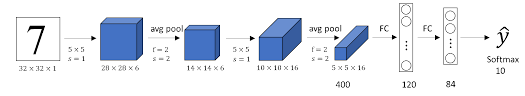

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import np_utils

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
# Preprocessing
x_train= x_train/255.0
x_test= x_test/255.0

In [6]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test= x_test.reshape(x_test.shape[0],28,28,1)

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [8]:
y_train= np_utils.to_categorical(y_train, 10)
y_test= np_utils.to_categorical(y_test, 10)

In [9]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


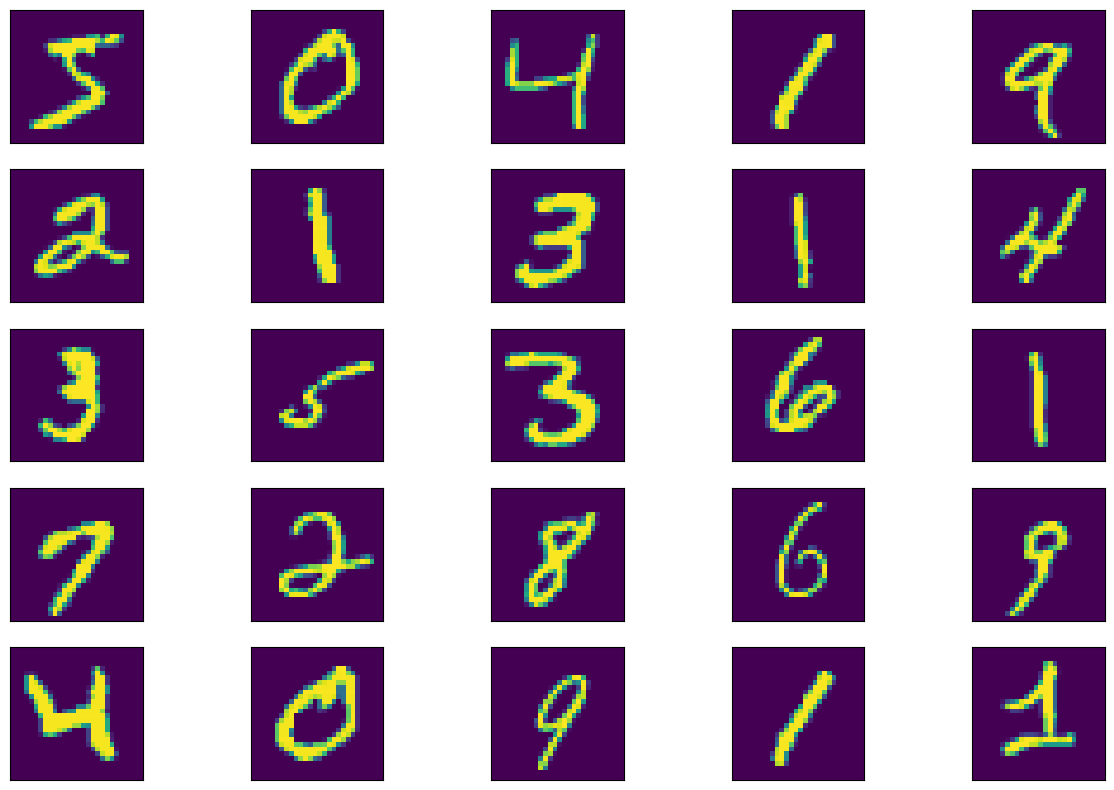

In [10]:
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])

plt.show()

Builsing LeNet-5 model

In [11]:
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, AveragePooling2D

In [12]:
# Architecture
model= Sequential()

# C1= Convulational Layer
model.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh', input_shape=(28,28,1)))
# Pooling layer - Average
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

# C2= Convulational Layer
model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'))
# Pooling layer - Average
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

# DNN
# Flatten
model.add(Flatten())

# Hidden layer
model.add(Dense(120, activation='tanh'))
# Hidden layer
model.add(Dense(84, activation='tanh'))
# Output
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [13]:
# Compile the model
model.compile(loss= keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [14]:
# Check train and test result
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size= 128, epochs= 10, verbose=1)

Epoch 1/10
469/469 [==============================] - 41s 79ms/step - loss: 0.3577 - accuracy: 0.8985 - val_loss: 0.1679 - val_accuracy: 0.9497
Epoch 2/10
469/469 [==============================] - 28s 60ms/step - loss: 0.1371 - accuracy: 0.9588 - val_loss: 0.1058 - val_accuracy: 0.9663
Epoch 3/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0925 - accuracy: 0.9708 - val_loss: 0.0792 - val_accuracy: 0.9763
Epoch 4/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0691 - accuracy: 0.9795 - val_loss: 0.0724 - val_accuracy: 0.9781
Epoch 5/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0566 - accuracy: 0.9827 - val_loss: 0.0674 - val_accuracy: 0.9794
Epoch 6/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0582 - val_accuracy: 0.9816
Epoch 7/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0392 - accuracy: 0.9876 - val_loss: 0.0491 - val_accuracy:

Text(0, 0.5, 'Accuracy')

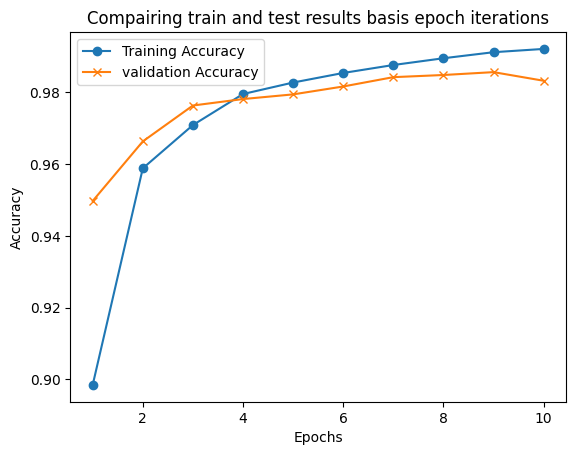

In [17]:
# Visualize the output
f, ax= plt.subplots()

ax.plot([None]+ history.history['accuracy'], 'o-')
ax.plot([None]+ history.history['val_accuracy'], 'x-')

ax.legend(['Training Accuracy', 'validation Accuracy'], loc=0)
ax.set_title('Compairing train and test results basis epoch iterations')

ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

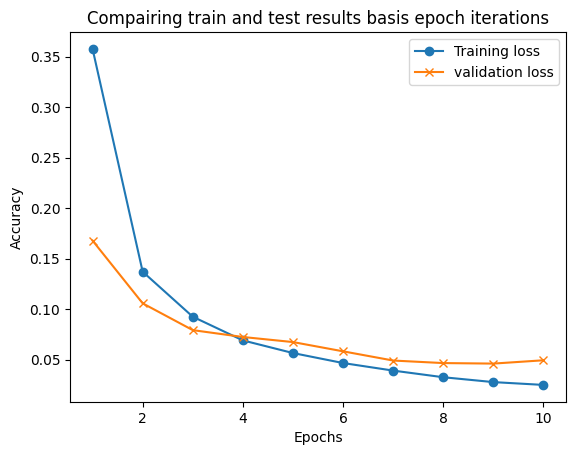

In [18]:
# Visualize the output
f, ax= plt.subplots()

ax.plot([None]+ history.history['loss'], 'o-')
ax.plot([None]+ history.history['val_loss'], 'x-')

ax.legend(['Training loss', 'validation loss'], loc=0)
ax.set_title('Compairing train and test results basis epoch iterations')

ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')